In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['WA_Fn-UseC_-HR-Employee-Attrition.csv']


In [2]:
dataset = pd.read_csv("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [3]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
dataset.Attrition = dataset.Attrition.apply(lambda x: 0 if x=="No" else 1)

In [5]:
print(np.unique(dataset.BusinessTravel), len(np.unique(dataset.BusinessTravel)))
print(np.unique(dataset.Department), len(np.unique(dataset.Department)))
print(np.unique(dataset.EducationField), len(np.unique(dataset.EducationField)))
print(np.unique(dataset.JobRole), len(np.unique(dataset.JobRole)))
print(np.unique(dataset.MaritalStatus), len(np.unique(dataset.MaritalStatus)))

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely'] 3
['Human Resources' 'Research & Development' 'Sales'] 3
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree'] 6
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative'] 9
['Divorced' 'Married' 'Single'] 3


In [6]:
dataset.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
X = pd.get_dummies(dataset.loc[:, dataset.columns!="Attrition"], drop_first=True)
y = pd.get_dummies(dataset.Attrition, drop_first=True)

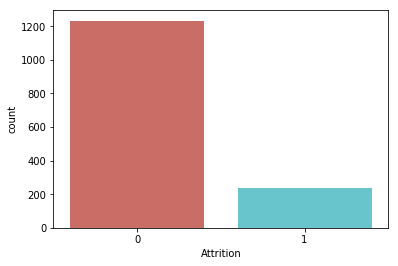

In [8]:
import seaborn as sns
sns.countplot(x=dataset.Attrition, palette="hls")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


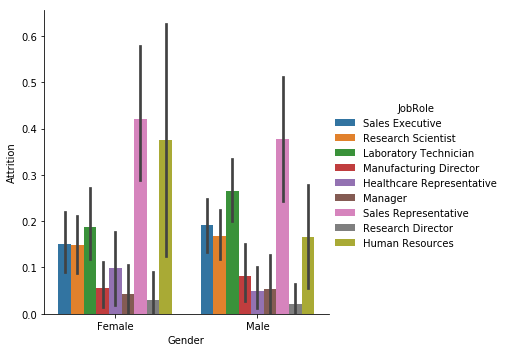

In [9]:
sns.catplot(x="Gender", y="Attrition", hue="JobRole", data=dataset, kind="bar")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


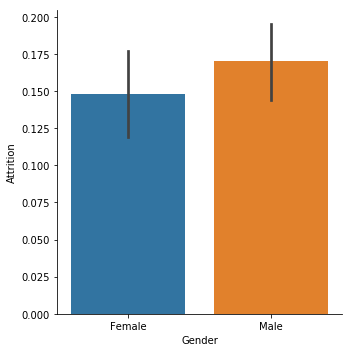

In [10]:
sns.catplot(x="Gender", y="Attrition", data=dataset, kind="bar")

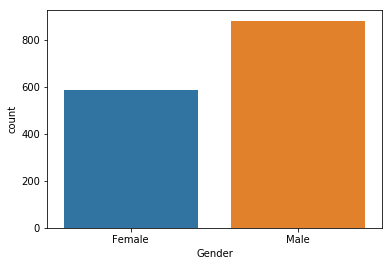

In [11]:
sns.countplot(x="Gender", data=dataset)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


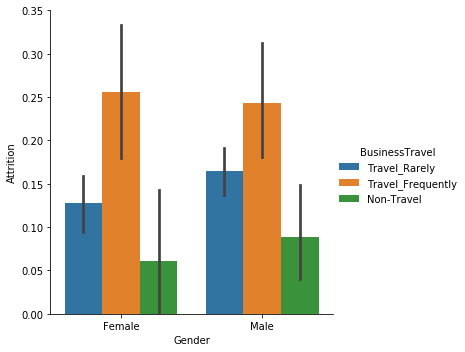

In [12]:
sns.catplot(x="Gender", y="Attrition", hue="BusinessTravel", data=dataset, kind="bar")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


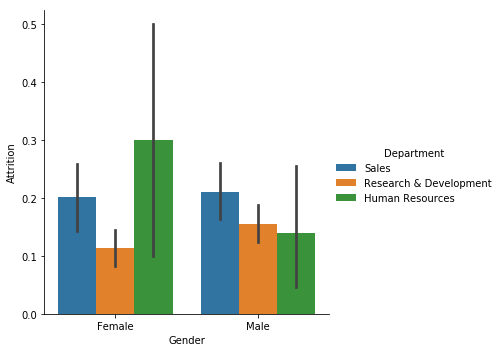

In [13]:
sns.catplot(x="Gender", y="Attrition", hue="Department", data=dataset, kind="bar")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


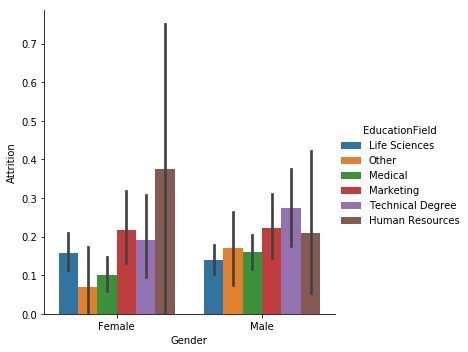

In [14]:
sns.catplot(x="Gender", y="Attrition", hue="EducationField", data=dataset, kind="bar")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


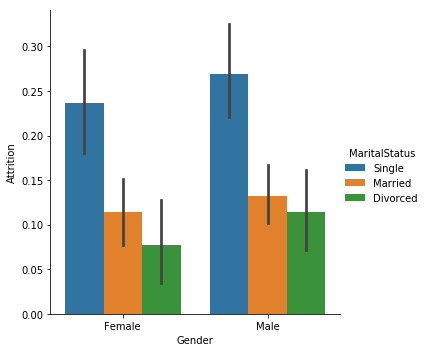

In [15]:
sns.catplot(x="Gender", y="Attrition", hue="MaritalStatus", data=dataset, kind="bar")

In [16]:
col_to_drop = []
for x in X:
    if len(np.unique(X[x])) == 1:
        col_to_drop+=[x]

In [17]:
X.drop(col_to_drop, axis=1)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
5,32,1005,2,2,8,4,79,3,1,4,3068,11864,0,13,3,3,0,8,2,2,7,7,3,6,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
6,59,1324,3,3,10,3,81,4,1,1,2670,9964,4,20,4,1,3,12,3,2,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
7,30,1358,24,1,11,4,67,3,1,3,2693,13335,1,22,4,2,1,1,2,3,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
8,38,216,23,3,12,4,44,2,3,3,9526,8787,0,21,4,2,0,10,2,3,9,7,1,8,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
9,36,1299,27,3,13,3,94,3,2,3,5237,16577,6,13,3,2,2,17,3,2,7,7,7,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


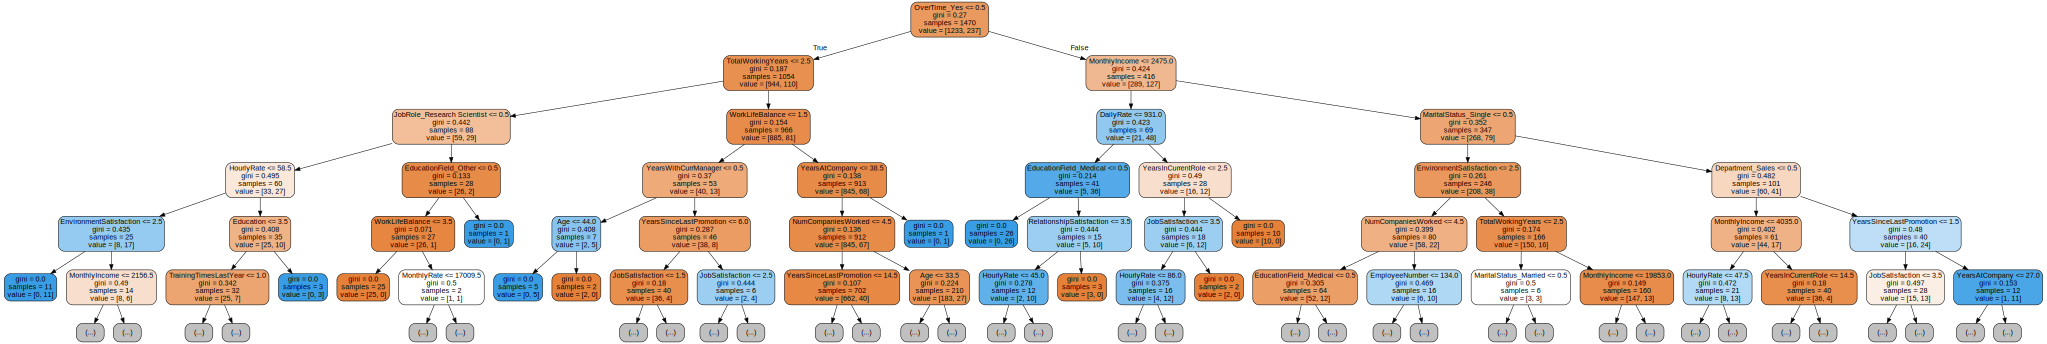

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X,y)
from sklearn.tree import export_graphviz
import graphviz 
viz = export_graphviz(dt,
                feature_names=X.columns,
                filled=True,
                rounded=True,
                max_depth=5,
                )
graph = graphviz.Source(viz) 
graph

In [19]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, stratify=y)

In [21]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [22]:
random_state = 40
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(BernoulliNB())

In [23]:
from sklearn.model_selection import cross_val_score
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, 
                                      X_train, 
                                      np.ravel(y_train), 
                                      scoring = "accuracy", 
                                      cv = 10, 
                                      n_jobs=4))
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())


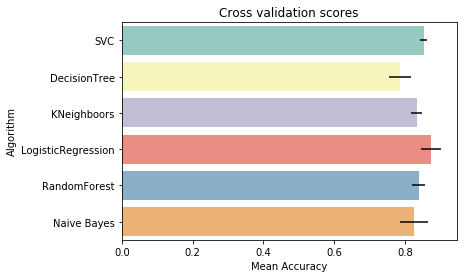

In [24]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC",
                                                                                      "DecisionTree",
                                                                                      "KNeighboors",
                                                                                      "LogisticRegression",
                                                                                      "RandomForest",
                                                                                      "Naive Bayes"]})
                                                                                      

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [25]:
cv_res.sort_values("CrossValMeans")

,CrossValMeans,CrossValerrors,Algorithm
1,0.785149,0.030576,DecisionTree
5,0.826061,0.039519,Naive Bayes
2,0.832772,0.015050,KNeighboors
4,0.838665,0.018111,RandomForest
0,0.853257,0.010075,SVC
3,0.873787,0.027147,LogisticRegression


In [26]:
votingC = VotingClassifier(estimators=[                                       
                                       ("LogReg",classifiers[3]), 
                                       ("RF",classifiers[4]),
                                       ("Naive Bayes", classifiers[5])], 
                           voting='hard', 
                           n_jobs=4)

In [27]:
votingC.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('LogReg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('RF', Random...rt=False)), ('Naive Bayes', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))],
         flatten_transform=None, n_jobs=4, voting='hard', weights=None)

In [28]:
cross_val_score(votingC, X_train, np.ravel(y_train), scoring = "accuracy", cv = 10, n_jobs=4).mean()

0.8688011612411956